# POC: Add new geospatial operations for ST_WITHIN, ST_DFULLYWITHIN, ST_POINT

https://github.com/ibis-project/ibis/issues/1924

- ST_WITHIN
- ST_DFULLYWITHIN
- ST_POINT

refs: https://docs.omnisci.com/latest/5_geospatial_functions.html

In [1]:
from typing import Dict, Optional
import ibis
import pandas as pd

In [2]:
db_conf = dict(
    host='localhost', port='6274', 
    user='admin', password='HyperInteractive', 
    database='ibis_testing'
)
con = ibis.omniscidb.connect(**db_conf)

con.list_tables()

['diamonds', 'batting', 'awards_players', 'functional_alltypes', 'geo']

## ST_WITHIN

Returns true if geometry A is completely within geometry B. For example the following SELECT statement returns true:

```sql
SELECT ST_WITHIN(
   'POLYGON ((1 1, 1 2, 2 2, 2 1))',
   'POLYGON ((0 0, 0 3, 3 3, 3 0))'
) FROM tbl;
```

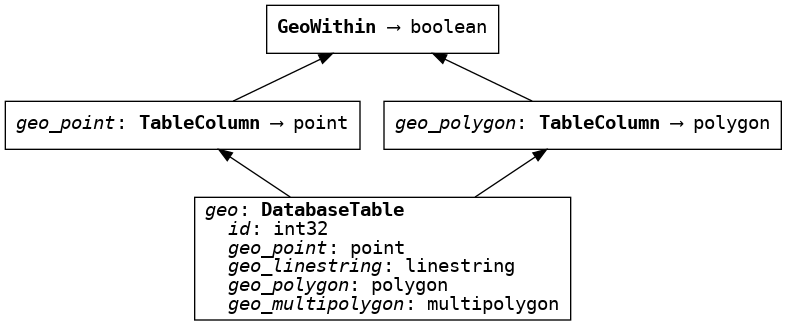

In [3]:
t = con.table('geo')
expr = t.geo_point.within(t.geo_polygon)
expr

In [4]:
print(expr.compile())
expr.execute()

SELECT ST_WITHIN("geo_point", "geo_polygon") AS tmp
FROM geo


0    False
1    False
2     True
3     True
4     True
Name: tmp, dtype: bool

## ST_DFULLYWITHIN

Returns true if the geometries are fully within the specified distance of one another. Distance is specified in units defined by the spatial reference system of the geometries. For example:

```sql
SELECT ST_DFULLYWITHIN(
    'POINT(1 1)',
    'LINESTRING (1 2,10 10,3 3)',
    10.0
) FROM tbl;
```

This function supports:

- ST_DFULLYWITHIN(POINT, LINESTRING, distance)
- ST_DFULLYWITHIN(LINESTRING, POINT, distance)



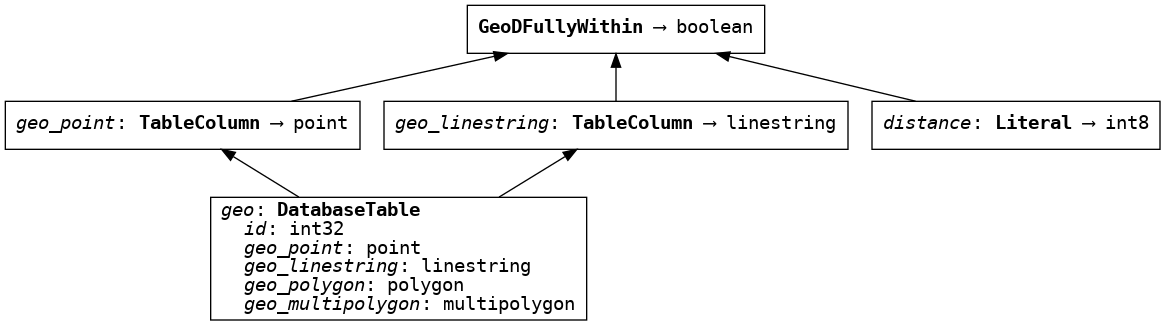

In [5]:
t = con.table('geo')
expr = t.geo_point.d_fully_within(t.geo_linestring, 2)
expr

In [6]:
print(expr.compile())
expr.execute()

SELECT ST_DFULLYWITHIN("geo_point", "geo_linestring", 2) AS tmp
FROM geo


0    True
1    True
2    True
3    True
4    True
Name: tmp, dtype: bool

## ST_Point(double lon, double lat)

Return a point constructed on the fly from the provided coordinate values. Constant coordinates result in construction of a POINT literal.

Example:

```sql
ST_Contains(poly4326, ST_SetSRID(ST_Point(lon, lat), 4326))
```

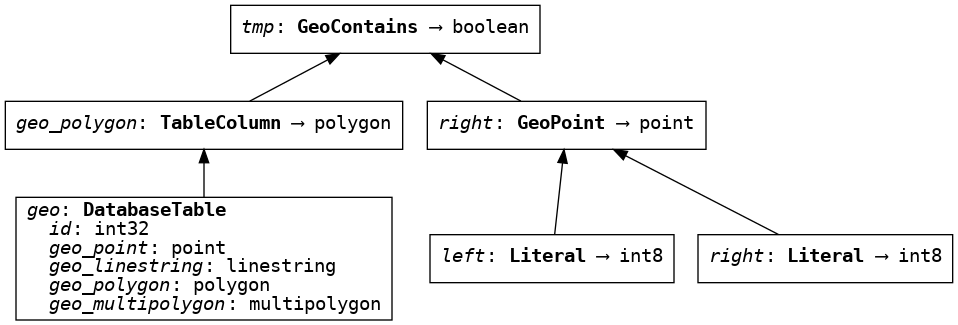

In [7]:
t = con.table('geo')
expr = t.geo_polygon.contains(ibis.geo_point(30, 10)).name('tmp')
expr

In [8]:
print(expr.compile())
expr.execute()

SELECT ST_CONTAINS("geo_polygon", ST_POINT(30, 10)) AS tmp
FROM geo


0     True
1    False
2    False
3    False
4    False
Name: tmp, dtype: bool